### 강의에서 소개된 파이썬 주요 기능
- numpy.arange: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
- pandas.cut: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
- matplotlib.pyplot.bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- matplotlib.pyplot.barh: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html
- matplotlib.pyplot.subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

### 경기 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
match_id = 2057987
match_events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057987,259956834,1H,1.797,14855,Korea Republic,14911,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76
1,2057987,259956835,1H,4.181,14855,Korea Republic,61962,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92
2,2057987,259956837,1H,10.078,14855,Korea Republic,95200,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32
3,2057987,259956840,1H,12.278,14855,Korea Republic,138633,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84
4,2057987,259956841,1H,15.823,14855,Korea Republic,138633,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2057987,259958565,2H,2995.205,15473,Mexico,112522,J. Corona,Pass,Simple pass,[Accurate],74.88,57.12,63.44,55.08
1465,2057987,259958567,2H,2997.217,15473,Mexico,3795,H. Moreno,Pass,Simple pass,[Accurate],63.44,55.08,59.28,45.56
1466,2057987,259958568,2H,2997.948,15473,Mexico,59003,R. Márquez,Pass,Simple pass,[Accurate],59.28,45.56,31.20,48.96
1467,2057987,259958570,2H,3000.929,15473,Mexico,255387,C. Salcedo,Pass,Simple pass,[Accurate],31.20,48.96,22.88,26.52


### 경기 이벤트 데이터 시간 구간별 집계 및 시각화

##### (1) pandas.cut 함수를 활용한 연속형 데이터 분할

- 5분 단위 분할 집계를 위한 기준점 리스트 생성

In [3]:
bins = np.arange(0, 50, 5)
bins = np.append(bins, [100])
bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45, 100])

- 기준점을 이용한 시간 구간 분할

In [4]:
match_events['time_cat'] = pd.cut(match_events['time'] / 60, bins, right=False)
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,time_cat
0,2057987,259956834,1H,1.797,14855,Korea Republic,14911,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76,"[0, 5)"
1,2057987,259956835,1H,4.181,14855,Korea Republic,61962,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92,"[0, 5)"
2,2057987,259956837,1H,10.078,14855,Korea Republic,95200,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32,"[0, 5)"
3,2057987,259956840,1H,12.278,14855,Korea Republic,138633,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84,"[0, 5)"
4,2057987,259956841,1H,15.823,14855,Korea Republic,138633,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84,"[0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2057987,259958565,2H,2995.205,15473,Mexico,112522,J. Corona,Pass,Simple pass,[Accurate],74.88,57.12,63.44,55.08,"[45, 100)"
1465,2057987,259958567,2H,2997.217,15473,Mexico,3795,H. Moreno,Pass,Simple pass,[Accurate],63.44,55.08,59.28,45.56,"[45, 100)"
1466,2057987,259958568,2H,2997.948,15473,Mexico,59003,R. Márquez,Pass,Simple pass,[Accurate],59.28,45.56,31.20,48.96,"[45, 100)"
1467,2057987,259958570,2H,3000.929,15473,Mexico,255387,C. Salcedo,Pass,Simple pass,[Accurate],31.20,48.96,22.88,26.52,"[45, 100)"


##### (2) 시간 구간별 이벤트 횟수 집계

- 5분 단위 팀당 이벤트 횟수 집계

In [5]:
match_events.pivot_table('event_id', ['period', 'time_cat'], 'team_name', 'count')

team_name         Korea Republic  Mexico
period time_cat                         
1H     [0, 5)                 37      64
       [5, 10)                19      33
       [10, 15)               24      50
       [15, 20)               28      55
       [20, 25)               21      45
       [25, 30)               33      33
       [30, 35)                8      41
       [35, 40)               38      58
       [40, 45)               47      41
       [45, 100)              11      14
2H     [0, 5)                 38      52
       [5, 10)                37      35
       [10, 15)               48      40
       [15, 20)               37      23
       [20, 25)               37      27
       [25, 30)               42      40
       [30, 35)               31      24
       [35, 40)               49      54
       [40, 45)               43      37
       [45, 100)              31      44

- 시간 구간 레이블 생성

In [6]:
labels = []
for i in range(len(bins)-2):
    label = f'{bins[i]:02d}-{bins[i+1]:02d}'
    labels.append(label)
labels.append('45+')
labels

['00-05',
 '05-10',
 '10-15',
 '15-20',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 '45+']

- 시간 구간 레이블을 추가한 5분 단위 팀당 이벤트 횟수 집계

In [7]:
match_events['time_cat'] = pd.cut(match_events['time'] / 60, bins=bins, labels=labels, right=False)
count_by_time = match_events.pivot_table('event_id', ['period', 'time_cat'], 'team_name', 'count', fill_value=0)
count_by_time

team_name        Korea Republic  Mexico
period time_cat                        
1H     00-05                 37      64
       05-10                 19      33
       10-15                 24      50
       15-20                 28      55
       20-25                 21      45
       25-30                 33      33
       30-35                  8      41
       35-40                 38      58
       40-45                 47      41
       45+                   11      14
2H     00-05                 38      52
       05-10                 37      35
       10-15                 48      40
       15-20                 37      23
       20-25                 37      27
       25-30                 42      40
       30-35                 31      24
       35-40                 49      54
       40-45                 43      37
       45+                   31      44

##### (3) 전반전 이벤트 횟수 5분 단위 시각화

- 전반전 시간 구간별 전체 이벤트 횟수 집계

In [8]:
half_count_by_time = count_by_time.loc['1H', 'Korea Republic']
half_count_by_time

time_cat
00-05    37
05-10    19
10-15    24
15-20    28
20-25    21
25-30    33
30-35     8
35-40    38
40-45    47
45+      11
Name: Korea Republic, dtype: int64

- plt.bar 함수를 활용한 막대그래프 시각화

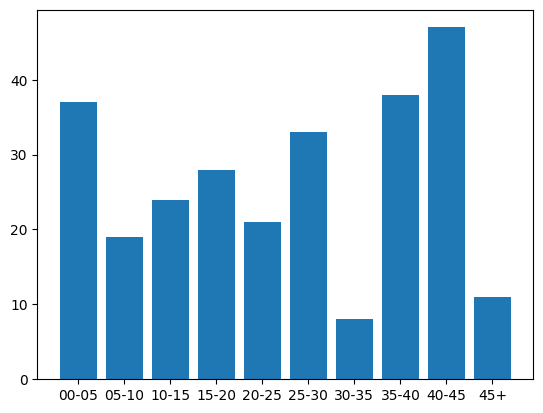

In [9]:
plt.bar(half_count_by_time.index, half_count_by_time.values)
plt.show()

##### (4) 경기 전체 이벤트 횟수 5분 단위 시각화

- 5분 단위 팀당 이벤트 횟수

In [10]:
count_by_time

team_name        Korea Republic  Mexico
period time_cat                        
1H     00-05                 37      64
       05-10                 19      33
       10-15                 24      50
       15-20                 28      55
       20-25                 21      45
       25-30                 33      33
       30-35                  8      41
       35-40                 38      58
       40-45                 47      41
       45+                   11      14
2H     00-05                 38      52
       05-10                 37      35
       10-15                 48      40
       15-20                 37      23
       20-25                 37      27
       25-30                 42      40
       30-35                 31      24
       35-40                 49      54
       40-45                 43      37
       45+                   31      44

- 다중 인덱스를 단일 인덱스로 변환

In [11]:
idx_1h = []
idx_2h = []

for multi_idx in count_by_time.index:
    if multi_idx[0] == '1H':
        idx = multi_idx[1]
        idx_1h.append(idx)
    else:
        if '-' in multi_idx[1]:
            edges = multi_idx[1].split('-')
            start_min = int(edges[0]) + 45
            end_min = int(edges[1]) + 45
            idx = f'{start_min:02d}-{end_min:02d}'
        else:
            idx = '90+'
        idx_2h.append(idx)

idx_1h, idx_2h

(['00-05',
  '05-10',
  '10-15',
  '15-20',
  '20-25',
  '25-30',
  '30-35',
  '35-40',
  '40-45',
  '45+'],
 ['45-50',
  '50-55',
  '55-60',
  '60-65',
  '65-70',
  '70-75',
  '75-80',
  '80-85',
  '85-90',
  '90+'])

- plt.barh 함수를 활용한 수평 막대그래프 시각화

In [12]:
count_by_time.index = idx_1h + idx_2h
count_by_time

team_name,Korea Republic,Mexico
00-05,37,64
05-10,19,33
10-15,24,50
15-20,28,55
20-25,21,45
25-30,33,33
30-35,8,41
35-40,38,58
40-45,47,41
45+,11,14


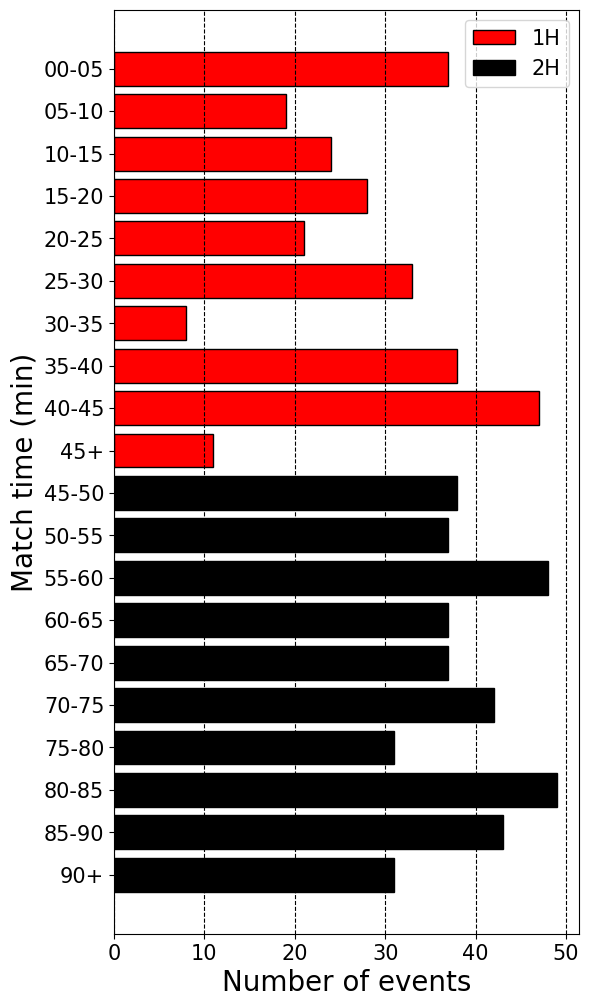

In [13]:
plt.figure(figsize=(6, 12))

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['red', 'black']):
    half_counts = count_by_time['Korea Republic'].loc[half_idx]
    plt.barh(half_idx, half_counts, label=half, color=color, edgecolor='black')

plt.gca().invert_yaxis()
plt.grid(axis='x', color='k', linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of events', fontsize=20)
plt.ylabel('Match time (min)', fontsize=20)
plt.show()

##### (5) Subplot을 활용한 팀별 발생 횟수 동시 시각화

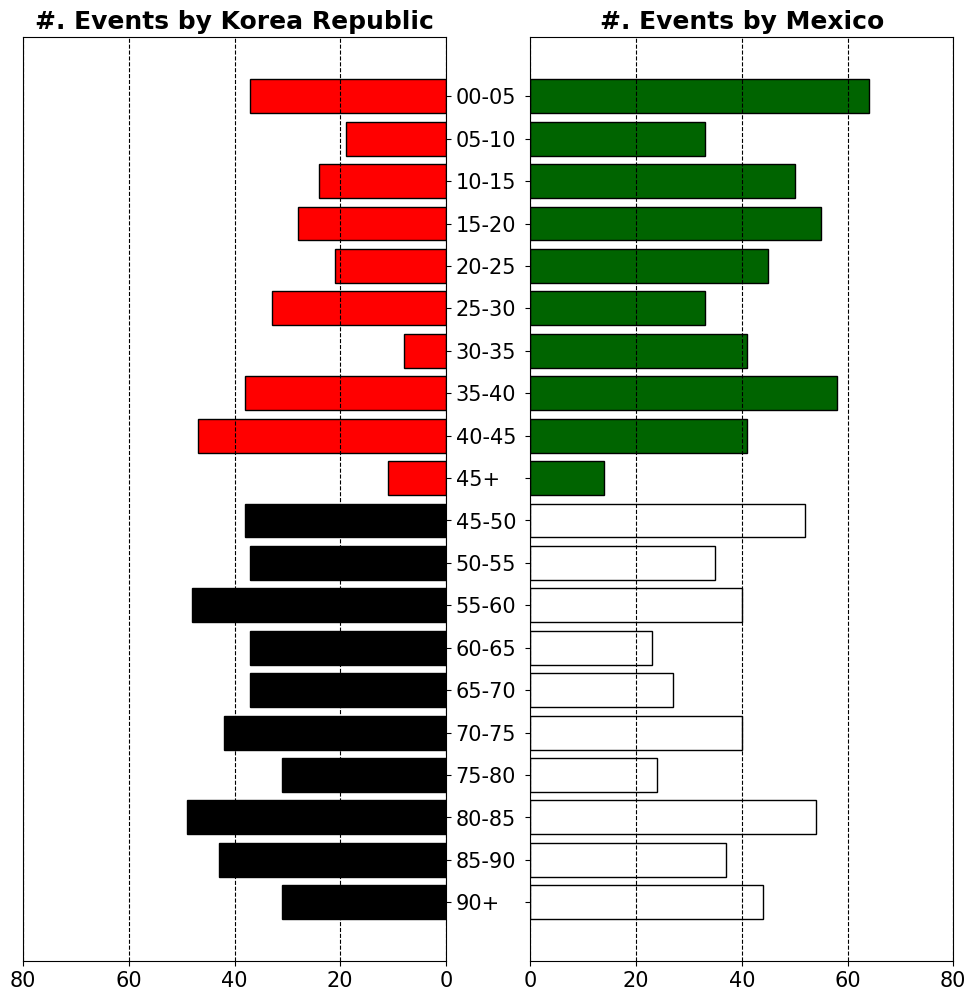

In [14]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 12))
team1_name, team2_name = match_events['team_name'].unique()

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['red', 'black']):
    half_counts = count_by_time[team1_name].loc[half_idx]
    axes[0].barh(half_idx, half_counts, color=color, edgecolor='k')

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['darkgreen', 'white']):
    half_counts = count_by_time[team2_name].loc[half_idx]
    axes[1].barh(half_idx, half_counts, color=color, edgecolor='k')

plt.gca().invert_yaxis()

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

for team_name, ax in zip([team1_name, team2_name], axes):
    ax.grid(axis='x', color='k', linestyle='--')
    ax.set_title(f'#. Events by {team_name}', size=18, fontweight='bold')
    ax.set_xticks(np.arange(0, 100, 20))
    ax.tick_params(labelsize=15)

plt.show()

### 대회 전체 이벤트 데이터 시간 구간별 집계 및 시각화

##### (1) 대회 전체 이벤트 데이터를 하나의 DataFrame으로 연결하기

In [15]:
dataset_name = 'World_Cup'
match_df = pd.read_csv(f'data/refined_events/{dataset_name}/matches.csv', index_col=0, encoding='utf-8-sig')

match_events_list = []

for match_id in match_df.index:
    match_events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
    match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index=True)
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057954,258612104,1H,1.656,16521,Saudi Arabia,122671,Mohammad Al Sahlawi,Pass,Simple pass,[Accurate],52.00,34.00,36.40,31.96
1,2057954,258612106,1H,4.488,16521,Saudi Arabia,139393,Abdullah Otayf,Pass,High pass,[Accurate],36.40,31.96,78.00,55.08
2,2057954,258612077,1H,5.937,14358,Russia,103668,I. Kutepov,Duel,Air duel,"[Won, Accurate]",26.00,12.92,38.48,11.56
3,2057954,258612112,1H,6.407,16521,Saudi Arabia,122940,Yasir Al Shahrani,Duel,Air duel,"[Lost, Not accurate]",78.00,55.08,65.52,56.44
4,2057954,258612110,1H,8.562,16521,Saudi Arabia,122847,Salman Al Faraj,Pass,Simple pass,[Accurate],65.52,56.44,73.84,57.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102508,2058017,263885652,2H,2978.302,9598,Croatia,3476,I. Rakitić,Pass,Simple pass,[Accurate],47.84,54.40,66.56,63.92
102509,2058017,263885653,2H,2979.085,9598,Croatia,14812,I. Perišić,Others on the ball,Touch,[],66.56,63.92,85.28,66.64
102510,2058017,263885654,2H,2983.449,9598,Croatia,14812,I. Perišić,Pass,Cross,"[Left foot, High, Not accurate]",85.28,66.64,104.00,34.00
102511,2058017,263885613,2H,2985.869,4418,France,25381,H. Lloris,Goalkeeper leaving line,Goalkeeper leaving line,[],0.00,34.00,14.56,38.76


##### (2) 시간 구간별 평균 이벤트 횟수 집계 및 시각화

- 5분 단위 평균 이벤트 횟수 집계

In [16]:
bins = np.arange(0, 50, 5)
bins = np.append(bins, [100])

labels = []
for i in range(len(bins)-2):
    label = f'{bins[i]:02d}-{bins[i+1]:02d}'
    labels.append(label)
labels.append('45+')

events['time_cat'] = pd.cut(events['time'] / 60, bins=bins, labels=labels, right=False)
count_by_time = events.groupby(['period', 'time_cat'])['event_id'].count()
count_by_time

period  time_cat
1H      00-05       5806
        05-10       5389
        10-15       5242
        15-20       5483
        20-25       5180
        25-30       5253
        30-35       4976
        35-40       4932
        40-45       4966
        45+         2158
2H      00-05       5939
        05-10       5153
        10-15       4988
        15-20       5162
        20-25       5058
        25-30       5043
        30-35       5056
        35-40       4854
        40-45       4798
        45+         4460
E1      00-05        415
        05-10        409
        10-15        370
        15-20        130
        20-25          0
        25-30          0
        30-35          0
        35-40          0
        40-45          0
        45+            0
E2      00-05        441
        05-10        285
        10-15        363
        15-20        128
        20-25          0
        25-30          0
        30-35          0
        35-40          0
        40-45          0
        

- 정규시간 데이터 선택 및 인덱스 변환

In [17]:
mean_count_by_time = count_by_time.loc[['1H', '2H']] / len(match_df)

idx_1h = []
idx_2h = []

for multi_idx in mean_count_by_time.index:
    if multi_idx[0] == '1H':
        idx = multi_idx[1]
        idx_1h.append(idx)
    else:
        if '-' in multi_idx[1]:
            edges = multi_idx[1].split('-')
            start_min = int(edges[0]) + 45
            end_min = int(edges[1]) + 45
            idx = f'{start_min:02d}-{end_min:02d}'
        else:
            idx = '90+'
        idx_2h.append(idx)

mean_count_by_time.index = idx_1h + idx_2h
mean_count_by_time

00-05    90.718750
05-10    84.203125
10-15    81.906250
15-20    85.671875
20-25    80.937500
25-30    82.078125
30-35    77.750000
35-40    77.062500
40-45    77.593750
45+      33.718750
45-50    92.796875
50-55    80.515625
55-60    77.937500
60-65    80.656250
65-70    79.031250
70-75    78.796875
75-80    79.000000
80-85    75.843750
85-90    74.968750
90+      69.687500
Name: event_id, dtype: float64

- 막대그래프 시각화

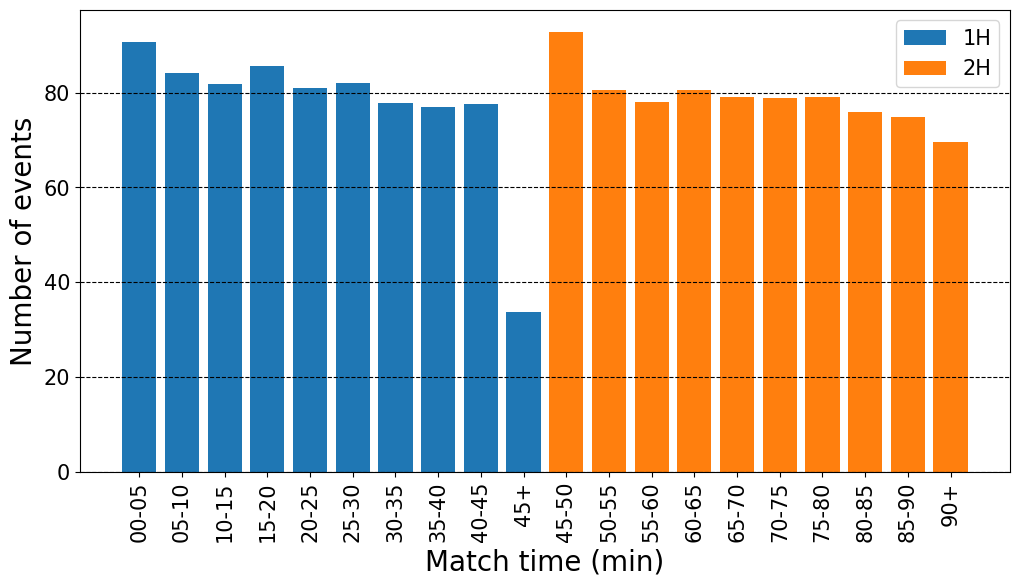

In [18]:
plt.figure(figsize=(12, 6))

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['C0', 'C1']):
    half_counts = mean_count_by_time[half_idx]
    plt.bar(half_idx, half_counts, label=half, color=color)

plt.grid(axis='y', color='k', linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Match time (min)', fontsize=20)
plt.ylabel('Number of events', fontsize=20)

# plt.savefig('img/count_by_time.png', bbox_inches='tight')
plt.show()

##### (3) 시간 구간별 득점 횟수 집계 및 시각화

- 득점 데이터 추출

In [19]:
goals = events[(events['tags'].apply(lambda x: 'Goal' in x or 'Own goal' in x)) & (events['period'] != 'P')]
goals

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,time_cat
232,2057954,258612368,1H,693.397,14358,Russia,102157,Y. Gazinskiy,Shot,Shot,"[Goal, Head/body, Opportunity, Position: Goal ...",96.72,27.20,104.0,34.0,10-15
711,2057954,258612935,1H,2532.305,14358,Russia,4513,D. Cheryshev,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",96.72,42.16,104.0,34.0,40-45
1273,2057954,258613527,2H,1554.119,14358,Russia,101669,A. Dzyuba,Shot,Shot,"[Goal, Head/body, Opportunity, Position: Goal ...",97.76,35.36,104.0,34.0,25-30
1567,2057954,258613749,2H,2748.726,14358,Russia,4513,D. Cheryshev,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",89.44,48.28,104.0,34.0,45+
1598,2057954,258613773,2H,2939.438,14358,Russia,257800,A. Golovin,Free kick,Free kick shot,"[Goal, Right foot, Direct, Opportunity, Positi...",84.24,22.44,104.0,34.0,45+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101475,2058017,263884397,1H,1676.03,9598,Croatia,14812,I. Perišić,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",90.48,39.44,104.0,34.0,25-30
101546,2058017,263884513,1H,2278.896,4418,France,3682,A. Griezmann,Free kick,Penalty,"[Goal, Left foot, Position: Goal low left, Acc...",92.56,34.68,104.0,34.0,35-40
101962,2058017,263885027,2H,816.147,4418,France,7936,P. Pogba,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",88.40,37.40,104.0,34.0,10-15
102066,2058017,263885135,2H,1177.059,4418,France,353833,K. Mbappé,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",78.00,29.92,104.0,34.0,15-20


- 5분 단위 득점 횟수 집계 및 인덱스 변환

In [20]:
goals_by_time = goals.groupby(['period', 'time_cat'])['event_id'].count()[['1H', '2H']]
goals_by_time.index = idx_1h + idx_2h
goals_by_time

00-05     7
05-10     6
10-15     8
15-20     7
20-25     6
25-30     3
30-35    10
35-40    10
40-45     5
45+       3
45-50     9
50-55    13
55-60    12
60-65     9
65-70    10
70-75    11
75-80     6
80-85     2
85-90    10
90+      19
Name: event_id, dtype: int64

- 막대그래프 시각화

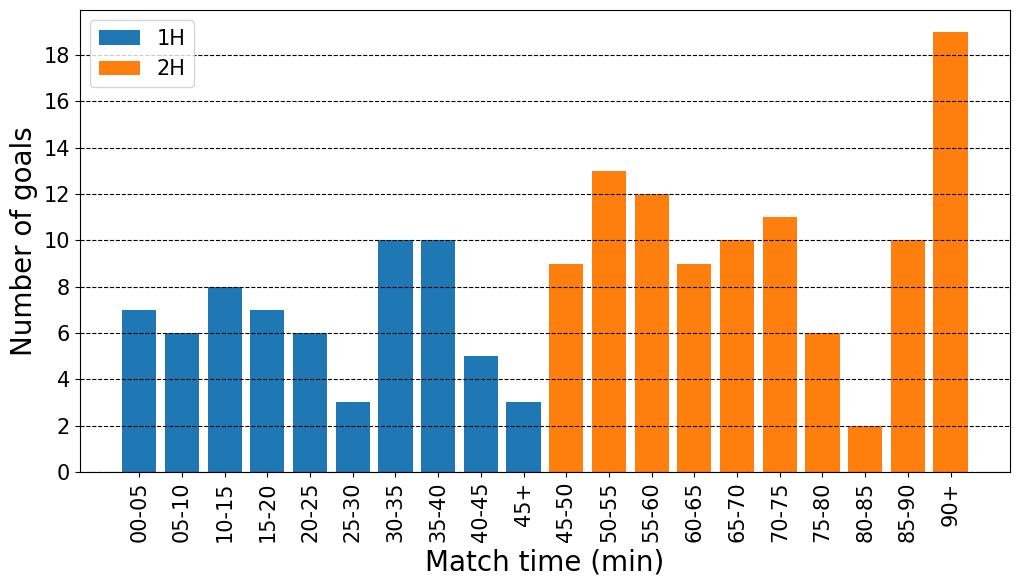

In [21]:
plt.figure(figsize=(12, 6))

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['C0', 'C1']):
    half_counts = goals_by_time[half_idx]
    plt.bar(half_idx, half_counts, label=half, color=color)

plt.grid(axis='y', color='k', linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(np.arange(0, 20, 2), fontsize=15)
plt.xlabel('Match time (min)', fontsize=20)
plt.ylabel('Number of goals', fontsize=20)
plt.show()